<a href="https://colab.research.google.com/github/rajesha123/samsung/blob/main/project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

load dataset

In [67]:
df = pd.read_csv("software_defects.csv")
df.head()

,code_complexity_cyclomatic,development_time_months,team_size,programming_language,developer_experience_avg_years,code_review_coverage,testing_coverage_percent,project_type,requirements_volatility,version_control_usage,continuous_integration,documentation_quality,customer_involvement,budget_constraints,defect_density_per_kloc
0,43.426546,19.342202,4.0,Python,5.360672,75.139916,NaN,Enterprise,Low,Expert,NaN,Poor,Medium,Moderate,9.010645
1,20.375855,NaN,14.0,C++,8.539208,17.329346,91.354974,Embedded,Low,Advanced,NaN,Excellent,Medium,Moderate,NaN
2,4.954424,10.338738,17.0,JavaScript,14.743924,93.774727,55.054366,Desktop,Medium,Basic,Basic,NaN,High,Severe,5.672287
3,45.427174,17.861228,6.0,NaN,2.343608,29.487048,NaN,Embedded,Low,Expert,NaN,Poor,High,Severe,NaN
4,15.514017,4.892648,20.0,C#,10.397844,0.176905,60.551397,Embedded,Medium,Expert,NaN,Fair,NaN,Severe,4.664320


info

In [68]:
print("Shape:", df.shape)
df.info()

Shape: (1000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   code_complexity_cyclomatic      969 non-null    float64
 1   development_time_months         949 non-null    float64
 2   team_size                       949 non-null    float64
 3   programming_language            940 non-null    object 
 4   developer_experience_avg_years  951 non-null    float64
 5   code_review_coverage            949 non-null    float64
 6   testing_coverage_percent        947 non-null    float64
 7   project_type                    962 non-null    object 
 8   requirements_volatility         953 non-null    object 
 9   version_control_usage           946 non-null    object 
 10  continuous_integration          632 non-null    object 
 11  documentation_quality           944 non-null    object 
 12  customer_involvem

missing values

In [69]:
df.isnull().sum()

,0
code_complexity_cyclomatic,31
development_time_months,51
team_size,51
programming_language,60
developer_experience_avg_years,49
code_review_coverage,51
testing_coverage_percent,53
project_type,38
requirements_volatility,47
version_control_usage,54


saparate the features and target

In [70]:
X = df.drop("defect_density_per_kloc", axis=1)
y = df["defect_density_per_kloc"]

In [71]:
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(include="object").columns

print("Numeric:", num_cols)
print("Categorical:", cat_cols)

Numeric: Index(['code_complexity_cyclomatic', 'development_time_months', 'team_size',
       'developer_experience_avg_years', 'code_review_coverage',
       'testing_coverage_percent'],
      dtype='object')
Categorical: Index(['programming_language', 'project_type', 'requirements_volatility',
       'version_control_usage', 'continuous_integration',
       'documentation_quality', 'customer_involvement', 'budget_constraints'],
      dtype='object')


data pre-processing

In [72]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

Data Analysis

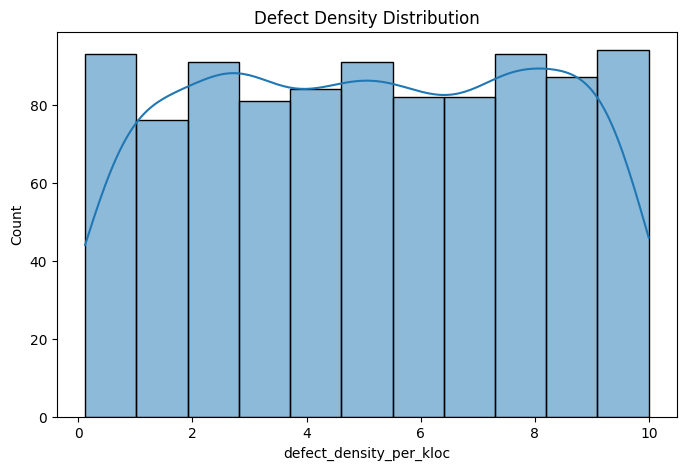

In [73]:
plt.figure(figsize=(8,5))
sns.histplot(df["defect_density_per_kloc"], kde=True)
plt.title("Defect Density Distribution")
plt.show()

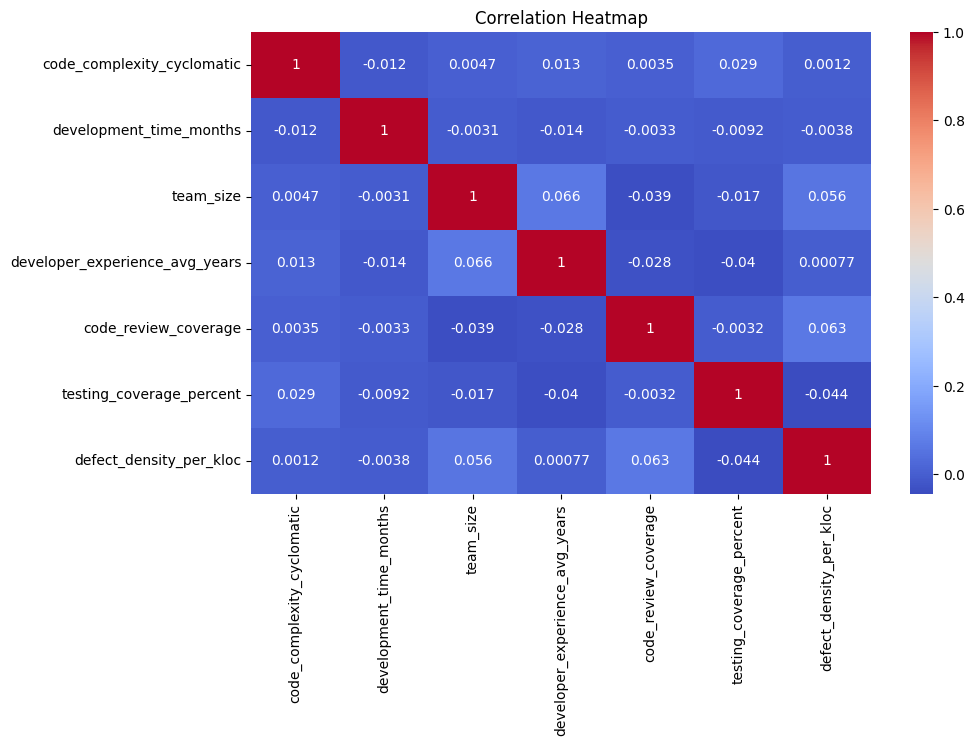

In [74]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols.tolist() + ["defect_density_per_kloc"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

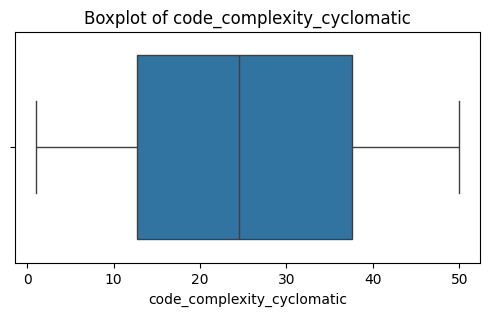

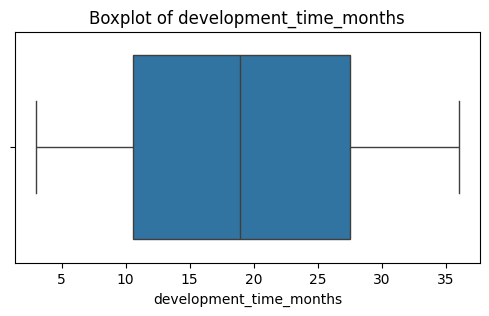

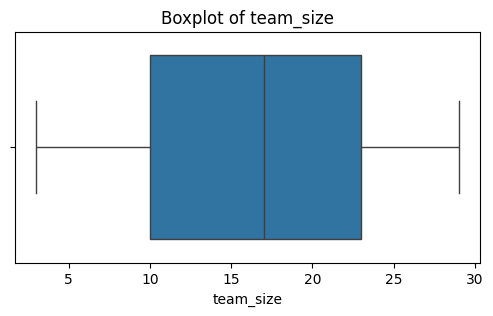

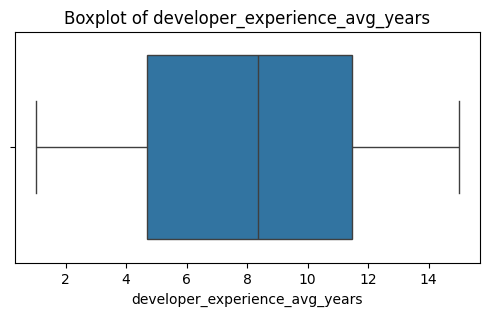

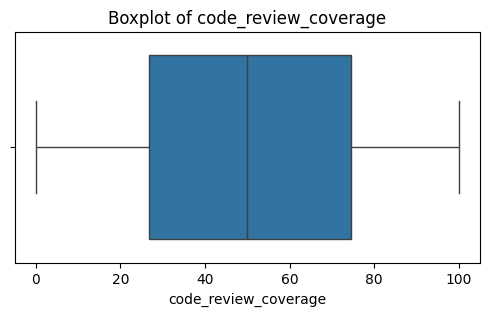

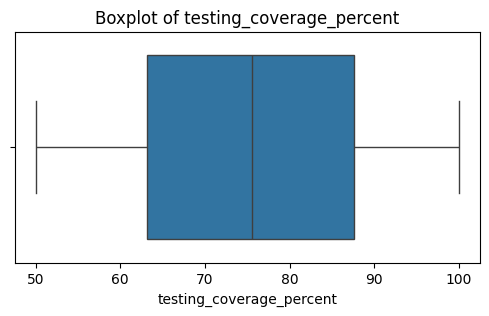

In [75]:
for col in numeric.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [76]:
cat_cols = df.select_dtypes(include=["object"]).columns
cat_cols

Index(['programming_language', 'project_type', 'requirements_volatility',
       'version_control_usage', 'continuous_integration',
       'documentation_quality', 'customer_involvement', 'budget_constraints'],
      dtype='object')

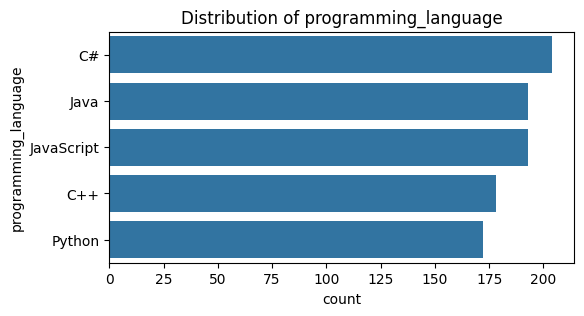

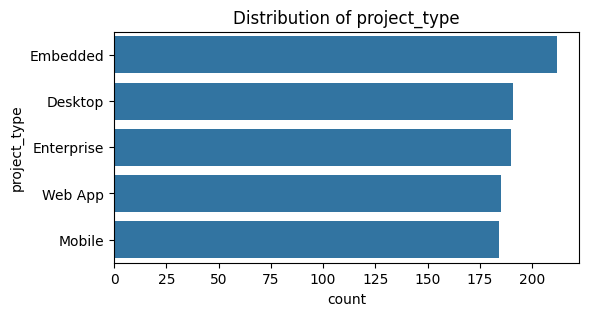

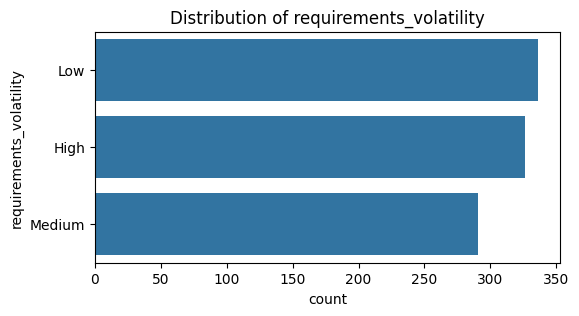

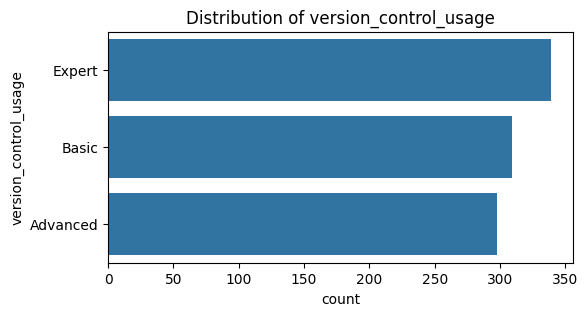

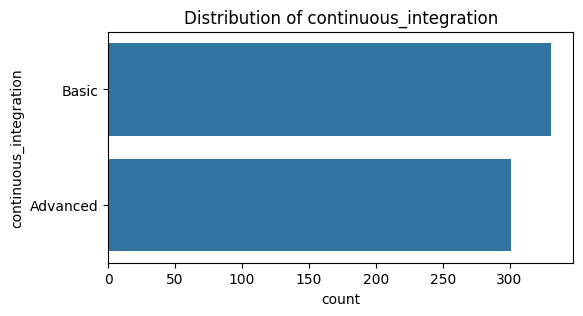

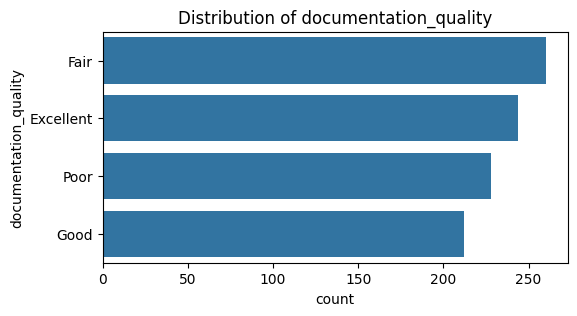

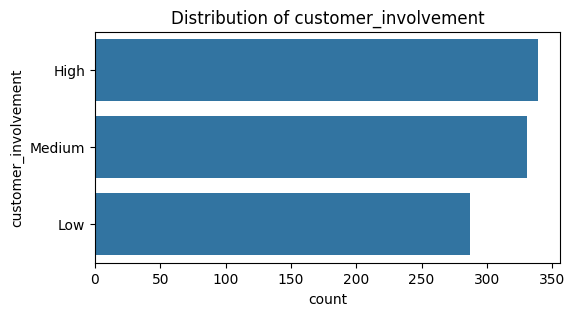

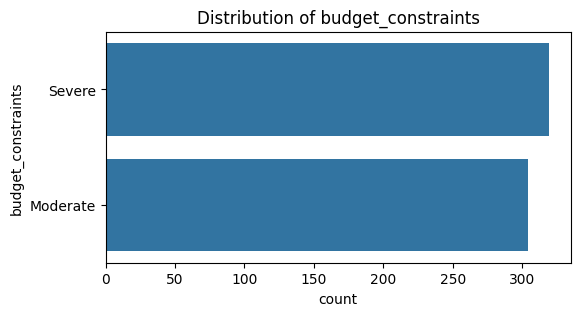

In [77]:
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

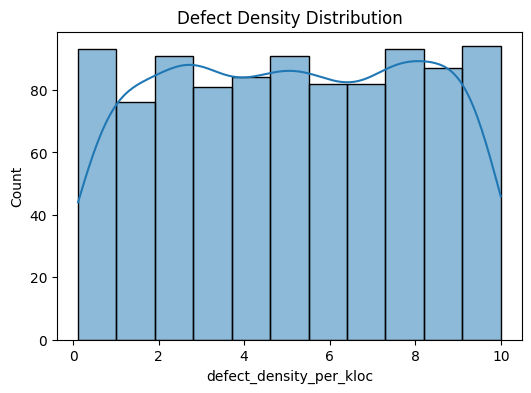

In [78]:
plt.figure(figsize=(6,4))
sns.histplot(df["defect_density_per_kloc"], kde=True)
plt.title("Defect Density Distribution")
plt.show()

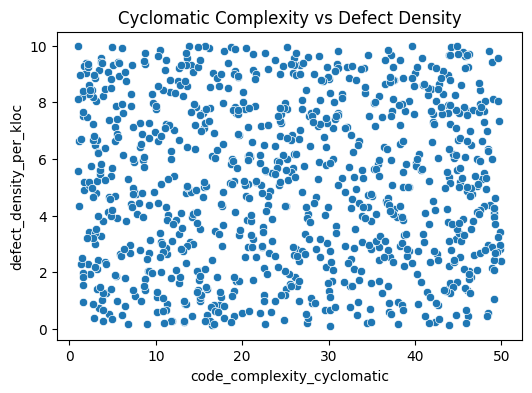

In [79]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df["code_complexity_cyclomatic"],
    y=df["defect_density_per_kloc"]
)
plt.title("Cyclomatic Complexity vs Defect Density")
plt.show()

train

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Regression model

In [81]:
models = {
    "Linear": LinearRegression(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])

    # Filter out NaN values from y_train and corresponding X_train
    not_nan_mask_train = y_train.notna()
    X_train_cleaned = X_train[not_nan_mask_train]
    y_train_cleaned = y_train[not_nan_mask_train]

    # Filter out NaN values from y_test and corresponding X_test
    not_nan_mask_test = y_test.notna()
    X_test_cleaned = X_test[not_nan_mask_test]
    y_test_cleaned = y_test[not_nan_mask_test]

    pipe.fit(X_train_cleaned, y_train_cleaned)
    preds = pipe.predict(X_test_cleaned)

    print(name)
    print("MAE:", mean_absolute_error(y_test_cleaned, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test_cleaned, preds)))
    print("R2:", r2_score(y_test_cleaned, preds))
    print("-"*30)

Linear
MAE: 2.7194487192507384
RMSE: 3.0808307395647048
R2: -0.005551948027098019
------------------------------
Lasso
MAE: 2.7321791137395834
RMSE: 3.073589276159796
R2: -0.0008304228912647815
------------------------------
Decision Tree
MAE: 3.339410485458334
RMSE: 4.162422238561159
R2: -0.8355283655168937
------------------------------
Random Forest
MAE: 2.729833030557448
RMSE: 3.0998459707030546
R2: -0.018003012171021515
------------------------------


Convert to Classification Problem

In [82]:
threshold = y.median()
df["high_defect"] = (df["defect_density_per_kloc"] > threshold).astype(int)

X = df.drop(["defect_density_per_kloc", "high_defect"], axis=1)
y = df["high_defect"]

Classification Train/Test Split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Conventional Classification Models

In [84]:
classifiers = {
    "Logistic": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, clf in classifiers.items():
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", clf)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    print(name)
    print("Accuracy:", accuracy_score(y_test, preds))
    print("F1 Score:", f1_score(y_test, preds))
    print("-"*30)

Logistic
Accuracy: 0.49
F1 Score: 0.4069767441860465
------------------------------
Decision Tree
Accuracy: 0.47
F1 Score: 0.42391304347826086
------------------------------
Random Forest
Accuracy: 0.5
F1 Score: 0.40476190476190477
------------------------------
KNN
Accuracy: 0.51
F1 Score: 0.449438202247191
------------------------------


Simple Neural Network

In [85]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [86]:
X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)

model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train_p.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(X_train_p, y_train, epochs=20, batch_size=32)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5002 - loss: 0.7022
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5403 - loss: 0.6857 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5760 - loss: 0.6736 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6388 - loss: 0.6577 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6149 - loss: 0.6551 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6647 - loss: 0.6450 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6463 - loss: 0.6445 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6433 - loss: 0.6376
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6493 - loss: 0.6263 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7066 - loss: 0.6063 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6830 - loss: 0.6100 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6968 - loss

Neural Network Evaluation

In [87]:
preds = (model.predict(X_test_p) > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy: 0.51
F1 Score: 0.4731182795698925
